* 1. Data Analysis( Feature enginnering,Data Wrinagling,Exploratory data 
analysis)
* 2. Data Visualization(Power Bi, Tableau, Matplotlib,Seabon, GGplot)
* 3. Choose Machine Learning Algorithm(Understand the Algorithm code from first principles)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
# Find out how many unique features are in the categorical features
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique()) # owner seems to be numerical
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [5]:
# check for missing values or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
df_final = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [9]:
df_final['current_year']= 2020

In [10]:
# because we believe the age of the tells us more about its depreciation
df_final['car_age']=df_final['current_year']-df_final['Year']

In [11]:
df_final.drop(['Year','current_year'],axis=1,inplace=True)

In [12]:
# Machine learning models only allow numerical data, we need to encode categorical data
df_final = pd.get_dummies(df_final,drop_first=True) # use dropfirst to avoid the dummy trap

In [13]:
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [14]:
# Check correlation of features
import seaborn as sns
df_final.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
car_age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


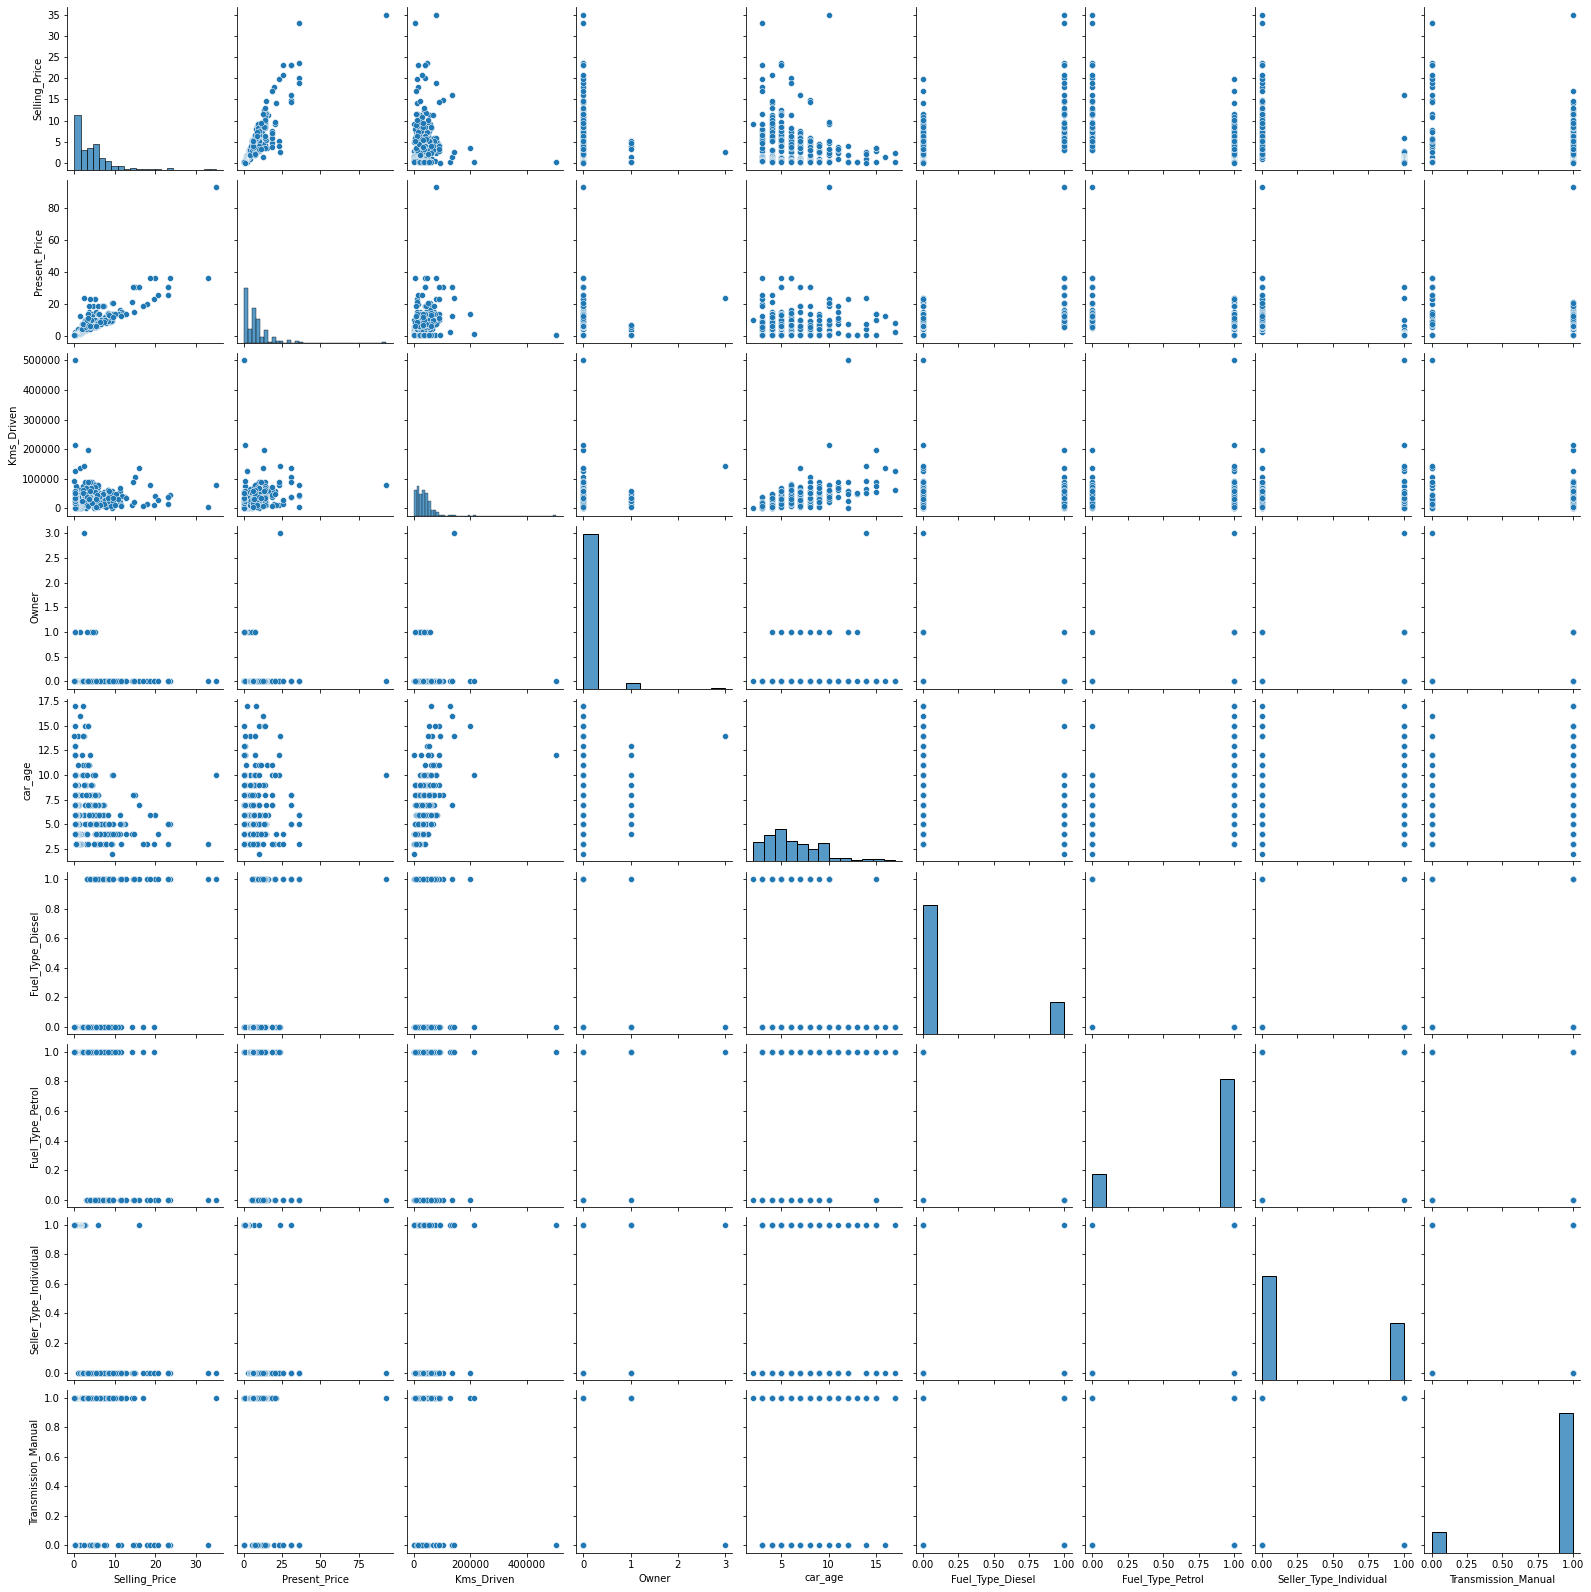

In [17]:
sns.pairplot(df_final) # this plot doesnt say much so we will try use it with a heatmap

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:>

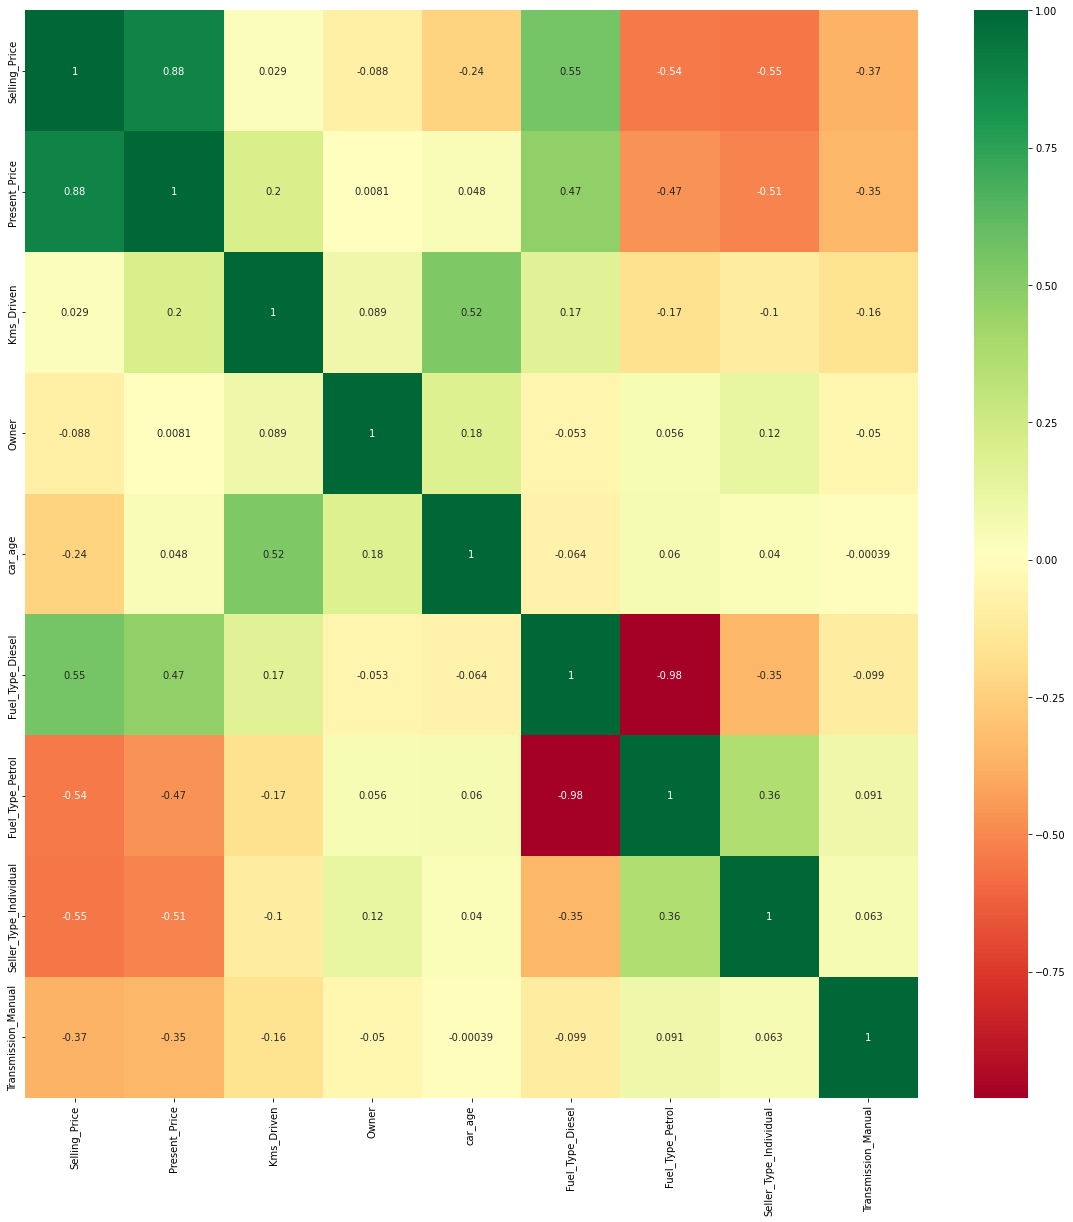

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df_final.corr(),annot=True,cmap='RdYlGn')

### we do not drop highly correlated features in this case since we already have a small amount of deatures in our dataset, but if we had alot of features , then we would have dropped features with correlation lower then -0.75 and those with correlation higher than 0.75.

In [18]:
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [19]:
print(df['Seller_Type'].unique())
df_final['Seller_Type_Individual'].unique()

['Dealer' 'Individual']


array([0, 1], dtype=uint8)

In [20]:
Y= df_final['Selling_Price']
X= df_final.drop(['Selling_Price'], axis=1)

In [21]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [22]:
X.head()

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [23]:
X.columns # These will be the fields required of the 

Index(['Present_Price', 'Kms_Driven', 'Owner', 'car_age', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [24]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor      #ExtraTreesClassifier is for when we want feature importance for  a classification problem
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[0.37143581 0.03838327 0.00087598 0.0762919  0.22789206 0.00520869
 0.14138116 0.13853112]


<AxesSubplot:>

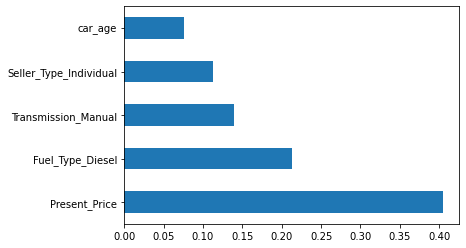

In [27]:
feature_imp =  pd.Series(model.feature_importances_,index= X.columns)
feature_imp.nlargest(5).plot(kind = 'barh')

In [26]:
# We can also use the model.coef_ for  a linear regrssion model in order for us to know which features are important OLS method
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X, Y)
importance = LR.coef_
for feature,score  in enumerate(importance):
    print(feature,score)

0 0.4371740071804221
1 -7.013214138409433e-06
2 -0.6741677690540646
3 -0.3930849824938077
4 2.4699352903982734
5 0.6076570999480857
6 -1.1213149938222364
7 -1.4481723992222446


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [28]:
# 1 Krish first uses randomforest regressor because it uses decision trees and doesnt require scaling
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [29]:
# Hyper parametertunning
# Number of trees in random forest
n_estimators = [ int(i) for i in np.linspace(start =100 ,stop=1200,num=12)]
# number of features to consider at every split
max_features = ['auto','sqrt']
# Max Depth
max_depth = [ int(i) for i in np.linspace(start =5 ,stop=30,num=6)]
# min number of samples to split a Node
min_samples_split = [2,5,10,15,100]
# Min number of samples required at each leaf Node
min_samples_leaf = [1,2,5,10]


In [30]:
from sklearn.model_selection import RandomizedSearchCV
# helps us to find best parameters out of the chosen of of estimators

In [31]:
# we use grid search since its faster than randomized searchcv
random_grid = { 'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf
    
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [32]:
# Use the Random Grid Search for best Hyperparameters
# first create the base model to tune
rf = RandomForestRegressor()

In [33]:
# verbose allows us tio see info for training
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                               scoring='neg_mean_squared_error',n_iter=10,cv=5,random_state=42,n_jobs=1)

In [34]:
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [39]:
prediction = rf_random.predict(X_test)

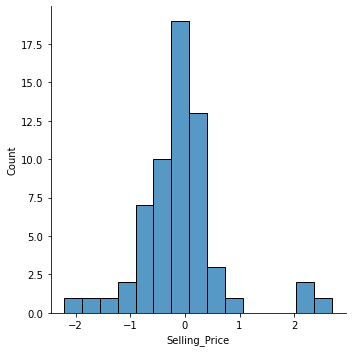

In [40]:
sns.displot(y_test-prediction) 

* we do this because we want to check for normality of the errors which means that we are getting good predictions
* to show that our errors are low we get a normal dist that is closely packed together, there is a small std

C:\Users\Zandi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

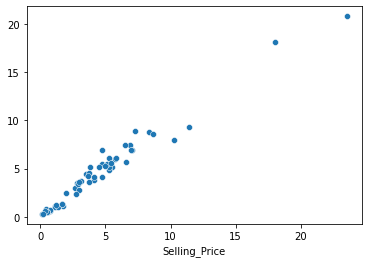

In [41]:
sns.scatterplot(y_test,prediction) 

* here we check if the errors are linear which means our predictions are good
* The values of predition with the y_tests are almost inline together showing their similar mostly so there is good predictions

In [42]:
#Model Pickling for Deployment
import pickle
file = open('rf_model.pkl','wb')
pickle.dump(rf_random,file)

In [43]:
!pip freeze > requirement.txt